## practicalRegress3


The goal of this practical is to implement non-linear regression method

Work your way through these examples filling in code where it says
"TO DO"


In [1]:
import os 
import numpy as np
import matplotlib.pyplot as plt
import scipy.io as spio
import scipy
from numpy import sqrt, pi, exp, transpose, matmul
from numpy.linalg import det, inv

%matplotlib notebook


## TO DO 
** First Run this file(all cells). It implements linear regression on a dataset that is clearly not very linear. 
It's a horrible fit! **

** Your job is to improve this by doing non-linear regression (as in Figure 8.6). **


In [2]:
#load data
X = spio.loadmat('nonLinearData.mat')['X']
w = spio.loadmat('nonLinearData.mat', squeeze_me=True)['w']


In [3]:
#The goal of this method is to pass the data through a non-linear transformation
def nonLinearTransform(X):

    #TO DO 
    #FIRST REMOVE THESE TWO LINES
    X2 = X
    return X
    
    #-------------------
    nDim,nData = X.shape

    #create space for output data
    X2 = np.zeros((6,nData))
    
    #For each data point
    for cData in range(nData):
        thisX = X[:,cData]

        #TO DO: perform non-linear transformation on thisX:
        #To do this evaluate this X against the 6 RBF functions in Figure 8.6b 
        #They are 6 Gaussians with means
        # -2.5 -1.5 -0.5 0.5 1.5 and 2.5, and variances of 0.16;
        
        #Replace this:
        transformedX = np.random.randn(6,1)
        
        #store
        X2[:,cData] = transformedX


    # checking for size of X2
    if not ( X2.shape == (6, nData) ):
        raise ValueError('X2 should have dimensions 6 x nData')
    else:
        pass
    
    return X2
    

In [4]:
#The goal of this routine is to take data X and w and fit the three
#parameters of the linear regression model
def fitLinearRegressionML(X,w):

    #number of data points 
    nDim,nData = X.shape

    #add a one to the start of each data example x
    X = np.vstack([np.ones((1,nData)) ,X])
    
    #compute phi vector (contains offset and slope)
    phi = inv(X@X.transpose())@X@w

    #extract the slope and offset from this vector
    offsetEst = phi[0]
    slopeEst = phi[1:]

    #compute the variance parameter
    Xt=X.transpose()
    noiseEst = (w-Xt@phi).transpose()@(w-Xt@phi)/nData;
        
    return offsetEst,slopeEst,noiseEst


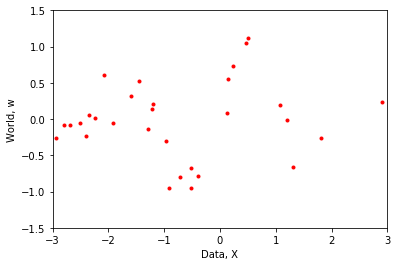

In [5]:
#display this data
fig=plt.figure()
plt.plot(X[0,:],w.squeeze(),'r.')
plt.xlabel('Data, X')
plt.ylabel('World, w')
fig.axes[0].set_xlim(-3,3)
fig.axes[0].set_ylim(-1.5,1.5)
plt.show()


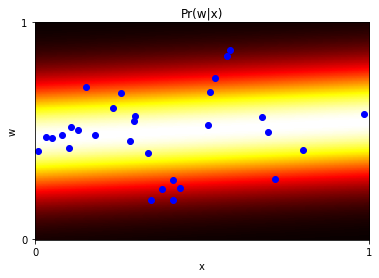

In [6]:
#TO DO 
#To implement non-linear regression, we simply pass the data through
#a non-linearity before we do the regression
#Fill in the routine (above cell)
XTransform = nonLinearTransform(X);

#now the problem is to fit the data
offsetEst,slopeEst,noiseEst = fitLinearRegressionML(XTransform,w);

#Let's make some draw a figure to show the posterior probability 
#of the world as a function of the data
#For every x, the model predicts a normal distribution over w
X2=np.arange(-3,3.001,step=0.01) 
X2=X2[np.newaxis,:] # => (nDim,nData) 
X2Transform = nonLinearTransform(X2)

#Compute the mean and variance of the prediction for each element of X2.  
predMean=slopeEst.transpose()@X2Transform+offsetEst
predMean=predMean.squeeze()
predVar=noiseEst*np.ones(X2Transform.shape[1])
predVar=predVar.squeeze()

#compute the pixel colours for the image - one Gaussian in each column
wFig = np.arange(-1.5,1.5001,step=0.01) 
postFun = np.zeros((wFig.size,X2.shape[1]))
for cX in range(X2.shape[1]):
    postFun[:,cX]=(1/np.sqrt(2*np.pi*predVar[cX]))*np.exp(-0.5 *((wFig-predMean[cX])**2)/predVar[cX])
    

# draw the figure
fig=plt.figure()
plt.imshow(postFun)
plt.set_cmap('hot')
plt.gca().invert_yaxis() 


#draw the points on top - they need to be rescaled so that they are in the 
#units of the pixels used to draw the picture
plt.plot(((X-X2[0,0])/(X2[0,1]-X2[0,0])).squeeze(), (w.transpose()-wFig[0])/(wFig[1]-wFig[0]),'bo')

#draw the units on the graph
ax0=fig.axes[0]
ax0.set_xticks([1,X2.shape[1]])
ax0.set_xticklabels([0,1])
ax0.set_yticks([1,wFig.size])
ax0.set_yticklabels([0,1])
ax0.set_aspect('auto')
plt.xlabel('x')
plt.ylabel('w')
plt.title('Pr(w|x)')
plt.show()

#TO DO
#When you've got this working you could try change this to work with the 
#arc tan functions if you like (figure 8.7)
# Note: Try some parameters, see if you can find better ones by trial and error. 
# Wouldn't it be nice to have a huge (or infinite?) set of basis functions? 
# Possible with Gaussian Process Regression!
